### Import other necessary pakages

In [1]:
import time
import sys
import os
path_project = "\\".join(os.getcwd().split("\\")[:-2])
sys.path.insert(1, path_project)
import math
import matplotlib.pyplot as plt
import numpy as np
import math
from pulsestreamer import PulseStreamer, Sequence  
from hardware.pulser.pulser import PulseGenerator, OutputState, TriggerStart, TriggerRearm, HIGH, LOW, INF, REPEAT_INFINITELY


### Import the digitizer class and connect 

In [2]:
from sidig import FIFO_DataAcquisition

In [3]:
SIDIG_ADDRESS = "dev/spcm0"
SIDIG_maxsr = 500e6  # Hz
SIDIG_timebase = int(1 / SIDIG_maxsr * 1e9)  # ns
FIFO=FIFO_DataAcquisition(
                sn_address=SIDIG_ADDRESS
            )

### Set up the pulse generator 

- create trigger for the digitizer
- create arbitrary waveform to read on the digitizer 

In [4]:
PSch_DIGTRIG=3
PSch_Arb=7
PS_chmap={'DIG_TRIG':PSch_DIGTRIG,"ARB INPUT":PSch_Arb}
ip = '192.168.1.26' 
ps = PulseGenerator(ip,PS_chmap)
INF = np.iinfo(np.int64).max


Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 192.168.1.26
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0


In [28]:
trigger_seq=[(100,0),(100,1),(100,0)]
# arb_seq=[(100,0),(10,1),(20,0),(30,1),(20,0),(10,1),(10,0),(100,0)]
arb_seq=[(200,0),(100,1),(300,0),(100,1),(100,0)]

In [29]:
ps.setDigital("DIG_TRIG", trigger_seq) 
ps.setDigital("ARB INPUT", arb_seq) 

ps.setTrigger
ps.plotSeq(plot_all=False)

### Configure the digitizer

In [7]:
# To set the configuration, make a dictionary with the key and value
num_iters=4
config1={'num_samples' :None,
         'runs': 2,
         'readout_ch' :0,
         'num_pts_in_exp':2,
         'num_iters':num_iters,
         'amp_input':5000}

In [8]:
FIFO.assign_param(config1)

In [9]:
FIFO.amp_input

5000

In [10]:
FIFO.config()

SETTINGS: card timeout =  20 s
SETTINGS: # segments =  512 Sa
SETTINGS: sampling freq =  0.5 GHz
SETTINGS: pretrig size =  32 Sa
SETTINGS: termination =  1


### Run the acquisition

In [11]:
FIFO.config()
FIFO.start_buffer()

SETTINGS: card timeout =  20 s
SETTINGS: # segments =  512 Sa
SETTINGS: sampling freq =  0.5 GHz
SETTINGS: pretrig size =  32 Sa
SETTINGS: termination =  1


In [30]:
ps.stream(n_runs=INF)

In [13]:
DATA=FIFO.acquire()

(1, 512, 1)
termination setting: 1


In [27]:
ps.reset()

In [15]:
FIFO.stop_card()
FIFO.reset()
ps.reset()

Card stopped


### Plot the data

In [16]:
DATA_flatten=np.ravel(DATA)

In [26]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Scatter(y=DATA_flatten, mode='lines', name='Data'))

fig.update_layout(
    title="Plotly Line Plot",
    xaxis_title="Index",
    yaxis_title="Value",
    template="plotly_white"
)

fig.show()


In [31]:
.1/2.6

0.038461538461538464

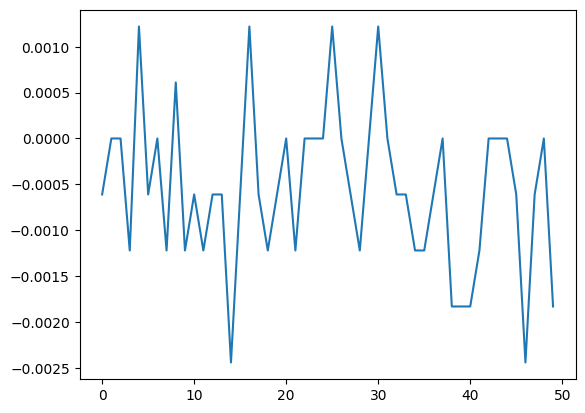

In [18]:
plt.plot(DATA_flatten[0:50])

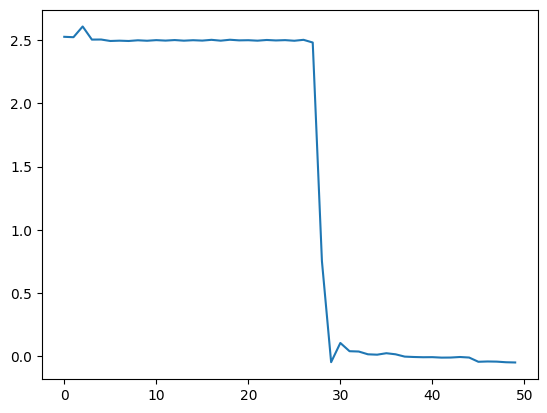

In [19]:
plt.plot(DATA_flatten[100:150])

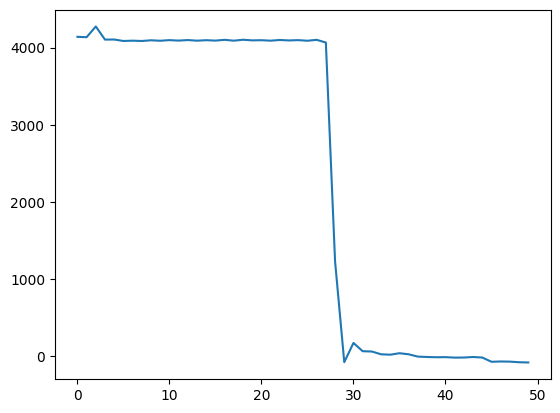

In [20]:
plt.plot(FIFO.raw_data[0][100:150])

In [5]:
from spcm import units 
import numpy as np

In [9]:
memory_size = 1*units.GiS

In [6]:
def convert(value, base_unit = None, dtype = int, rounding = np.rint):
    if isinstance(value, units.Quantity):
        if base_unit is not None:
            base_value = value.to(base_unit)
        else:
            base_value = value.to_base_units()
        if rounding is not None:
            return int(rounding(base_value.magnitude))
        else:
            return dtype(base_value.magnitude)
    return value

In [10]:
convert(memory_size, units.Sa, int)

1073741824

In [13]:
1073741824/1024/1024/1024


1.0

In [16]:

databufferlen = 200
tt_seq = 20 #ns
rate_refresh = 11 #Hz
num_segment = int(databufferlen / (tt_seq * rate_refresh / 1e9)) // 32 * 32

In [ ]:
1/rate_refresh*1E9/tt_seq

In [17]:
num_segment

909090880